In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

#read the file
df=pd.read_csv('NSE-TATAGLOBAL11.csv')
#print the head
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


/Users/haoranyu/.local/share/virtualenvs/second_project-CEnMExsQ/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


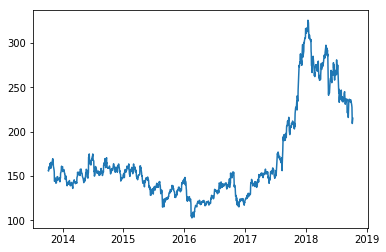

In [2]:
#setting index as date
df['Date']=pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index=df['Date']

#plot
#plt.figure(figsize=(16,8))
plt.figure()
plt.plot(df['Close'],label='Close Price history')

In [3]:
#implement moving avg
data=df.sort_index(ascending=True,axis=0)
data.head(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2013-10-08,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94
2013-10-09,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
2013-10-10,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
2013-10-11,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
2013-10-14,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09


In [4]:
new_data=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
for i in range(0,len(data)):
    new_data['Date'][i]=data['Date'][i]
    new_data['Close'][i]=data['Close'][i]
    
train=new_data[:987]
valid=new_data[987:]
new_data.shape, train.shape, valid.shape



((1235, 2), (987, 2), (248, 2))

In [5]:
preds=[]
for i in range(0,248):
    a=train['Close'][len(train)-248+i:].sum()+sum(preds)
    b=a/248
    preds.append(b)
rms=np.sqrt(np.mean(np.power(valid['Close']-preds,2)))
rms

104.51415465984348

/Users/haoranyu/.local/share/virtualenvs/second_project-CEnMExsQ/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


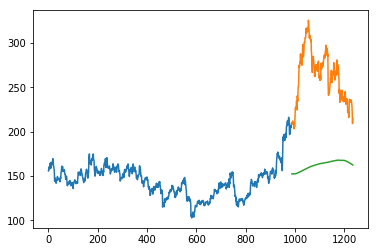

In [6]:
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])


In [2]:

#add features
from fastai.structured import  add_datepart
df['Date']=pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index=df['Date']
data=df.sort_index(ascending=True,axis=0)

new_data=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

for i in range(0,len(data)):
    new_data['Date'][i]=data['Date'][i]
    new_data['Close'][i]=data['Close'][i]
    
    
add_datepart(new_data,'Date')    
new_data.drop('Elapsed', axis=1, inplace=True)
    

In [3]:
new_data['mon_fri']=0
for i in range(0,len(new_data)):
    if (new_data['Dayofweek'][i]==0 or new_data['Dayofweek'][i]==4):
        new_data['mon_fri'][i]=1
    else:
        new_data['mon_fri'][i]=0


/Users/haoranyu/.local/share/virtualenvs/second_project-CEnMExsQ/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/haoranyu/.local/share/virtualenvs/second_project-CEnMExsQ/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [10]:
#split dataset
train=new_data[:987]
valid=new_data[987:]
x_train=train.drop('Close',axis=1)
y_train=train['Close']
x_valid=valid.drop('Close',axis=1)
y_valid=valid['Close']


In [11]:
#linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
print(rms)

121.16291596523492


In [12]:
#from pyramid.arima import auto_arima

ModuleNotFoundError: No module named 'pyramid'

In [2]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

data=df.sort_index(ascending=True,axis=0)
new_data=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)
dataset = new_data.values
print('dataset.shapew:',dataset.shape)
train = dataset[0:987,:]
valid = dataset[987:,:]
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

x_train,y_train=[],[]
for i in range(60,len(train)):
    x_train.append(train[i-60:i,0])
    y_train.append(train[i,0])

x_train=np.array(x_train)
y_train=np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=5, batch_size=1, verbose=2)





Using TensorFlow backend.


dataset.shapew: (1235, 1)
Instructions for updating:
Colocations handled automatically by placer.


/Users/haoranyu/.local/share/virtualenvs/second_project-CEnMExsQ/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Instructions for updating:
Use tf.cast instead.
Epoch 1/5
 - 1983s - loss: 22235.4785
Epoch 2/5
 - 144s - loss: 12938.3866
Epoch 3/5
 - 138s - loss: 7661.8949
Epoch 4/5
 - 79s - loss: 4911.3339
Epoch 5/5
 - 74s - loss: 3706.7276


In [ ]:
#prediction 

inputs=scaled_data[len(scaled_data)-len(valid)-60:]
print(inputs.shape)
test=[]
for i in range(60,inputs.shape[0]):
    test.append(inputs[i-60:i,0])
    
test=np.array(test)
test = np.reshape(test, (test.shape[0],test.shape[1],1))
closing_price=model.predict(test)
closing_price = scaler.inverse_transform(closing_price)


rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))

rms


In [1]:
#data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
%matplotlib inline
from mpl_finance import candlestick_ohlc
from mpl_finance import candlestick2_ohlc
from mpl_finance import volume_overlay2
from mpl_finance import volume_overlay
from mpl_finance import index_bar
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM,Input
df=pd.read_csv('tw_spydata_raw.csv')
#print the head
#df.head()



#close price and volume will be used in lstm
df['Trade Close']
df['Trade Volume']
#check is there any nan item 
df.isnull().values.sum()

#lstm data
#lstm_data=pd.DataFrame(index=range(0,len(df)),columns=['Close','Volume'])

#for i in range(0,len(df)):
#    lstm_data['Volume'][i]=df['Trade Volume'][i]
#    lstm_data['Close'][i]=df['Trade Close'][i]

lstm_data=df[['Trade Close', 'Trade Volume']].copy()
print("lstm_data: ",lstm_data.shape)
feature_lst=[]
target_lst=[]
lstm_data=lstm_data.values.astype(float)

lstm_data_reducer=lstm_data[1:]
lstm_data_reduce=lstm_data[:-1]#latter, use lstm_data_reducer/lstm_data_reduce
log_return_fea=np.log(lstm_data_reducer)-np.log(lstm_data_reduce)

lstm_data_reducer=lstm_data[34:,0]
lstm_data_reduce=lstm_data[:-34,0]
log_return_tar=np.log(lstm_data_reducer)-np.log(lstm_data_reduce)
print("log_return_tar:",log_return_tar.shape)
#log_return_tar=log_return_fea[29:]
for i in range(75309+29+1,log_return_fea.shape[0]-4):
    feature_lst.append(log_return_fea[i-29:i])
    target_lst.append(log_return_tar[i-29])
    vol=df.loc[i-29:i,'Trade Volume'].copy()
    opens=df.loc[i-29:i,'Trade Open'].copy()
    closes=df.loc[i-29:i,'Trade Close'].copy()
    highs=df.loc[i-29:i,'Trade High'].copy()
    lows=df.loc[i-29:i,'Trade Low'].copy()
    
    fig = plt.figure()
    #ax = plt.subplot2grid((6,1), (0,0), rowspan = 3, colspan = 1)
    #ax2 = plt.subplot2grid((6,1), (3,0), rowspan = 3, colspan = 1, sharex = ax)
    ax=plt.subplot(211,frameon=False)


    ax2=plt.subplot(212, sharex=ax,frameon=False)
    candlestick2_ohlc(ax, opens.values,highs.values,lows.values,closes.values, width=0.8, colorup='blue', colordown='red')
    
    bc = volume_overlay(ax2, opens.values,closes.values,vol.values, colorup='g', alpha=1, width=0.8,colordown='g')
    
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax.set_xticks([])
    ax.set_yticks([])
    plt.savefig('./candle_img/candle'+str(i-29)+'.png')
    plt.cla()
    plt.close(fig)
#     ohlc= df.loc[i-29:i+1,['Time', 'Trade Open', 'Trade High', 'Trade Low','Trade Close']].copy()

#     #fig = plt.figure()
#     #ax = fig.add_subplot(111)
    
#     fig = plt.figure()
#     #ax = plt.subplot2grid((6,1), (0,0), rowspan = 3, colspan = 1)
#     #ax2 = plt.subplot2grid((6,1), (3,0), rowspan = 3, colspan = 1, sharex = ax)
#     ax=plt.subplot(2, 1, 1)

   
#     ax2=plt.subplot(212, sharex=ax)
#     candlestick_ohlc(ax, ohlc.values, width=0.8, colorup='blue', colordown='red')
    
#     #ax2 = ax.twinx()
#     #f1, ax = plt.subplots(figsize = (10,5))
#     #bar=df.loc[i-29:i+1,['Time', 'Trade Open', 'Trade High', 'Trade Low','Trade Close','Trade Volume']].copy()
#     #opens=df.loc[i-29:i+1,['Trade Open']].copy()
#     closes=df.loc[i-29:i+1,['Trade Close']].copy()
#     vol=df.loc[i-29:i+1,['Trade Volume']].copy()
#     bc = volume_overlay2(ax2, closes,vol.values, colorup='g', alpha=1, width=0.8,colordown='g')
#     ax2.add_collection(bc)
#     # plot the candlesticks
#     #candlestick_ohlc(ax, ohlc.values, width=0.8, colorup='blue', colordown='red')
    
    
#     #index_bar(ax, bar.values, facecolor='g', edgecolor='g', width=0.8, alpha=1.0)

#     #ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#     ax2.set_xticks([])
#     ax2.set_yticks([])
#     ax.set_xticks([])
#     ax.set_yticks([])
#     plt.savefig('./candle_img/candle'+str(i-29)+'.png')
    #ohlc= df[['Time', 'Trade Open', 'Trade High', 'Trade Low','Trade Close']].copy()


    #f1, ax = plt.subplots(figsize = (10,5))


    #candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')

    
    #target_lst.append(lstm_data[,0])
#    lstm_data['Volume'][i-30:i]
#    lstm_data['Close'][i-30:i]
train_size=int(len(feature_lst)*0.7)
test_size=len(feature_lst)-train_size
feature_train_set=np.array(feature_lst[0:train_size])
target_train_set=np.array(target_lst[0:train_size])


print("finish mission")


#ohlc= df.loc[:30,['Time', 'Trade Open', 'Trade High', 'Trade Low','Trade Close']].copy()


#f1, ax = plt.subplots(figsize = (10,5))

# plot the candlesticks
#candlestick_ohlc(ax, ohlc.values, width=0.8, colorup='blue', colordown='red')
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#ax.set_xticks([])
#ax.set_yticks([])

#plt.show()
#ohlc= df.loc[10:40,['Time', 'Trade Open', 'Trade High', 'Trade Low','Trade Close']].copy()
#time=df.loc[10:15,['Time']].copy()
# vol=df.loc[10:40,'Trade Volume'].copy()
# opens=df.loc[10:40,'Trade Open'].copy()
# closes=df.loc[10:40,'Trade Close'].copy()
# highs=df.loc[10:40,'Trade High'].copy()
# lows=df.loc[10:40,'Trade Low'].copy()
# #time_vol=df.loc[10:15,['Time','Trade Volume']].copy()
# #print(vol)
# #fig = plt.figure()
# #ax = fig.add_subplot(111)
    
# fig = plt.figure()
# #ax = plt.subplot2grid((6,1), (0,0), rowspan = 3, colspan = 1)
# #ax2 = plt.subplot2grid((6,1), (3,0), rowspan = 3, colspan = 1, sharex = ax)
# ax=plt.subplot(2, 1, 1)

   
# ax2=plt.subplot(212, sharex=ax)
# candlestick2_ohlc(ax, opens.values,highs.values,lows.values,closes.values, width=0.8, colorup='blue', colordown='red')
# #ax2.bar(time,vol.values,color='green')

# #time_vol.plot(x='Time',y='Trade Volume',kind='bar',ax=ax2)
# #ax2 = ax.twinx()
# #f1, ax = plt.subplots(figsize = (10,5))
# #bar=df.loc[0:30,[ 'Trade Volume']].copy()
# #opens=df.loc[i-29:i+1,['Trade Open']].copy()
# #closes=df.loc[10:15,['Trade Close']].copy()
# #vol=df.loc[10:15,['Trade Volume']].copy()https://plot.ly/pandas/candlestick-charts/#candlestick-charts-in-cufflinks
# bc = volume_overlay(ax2, opens.values,closes.values,vol.values, colorup='g', alpha=1, width=0.8,colordown='g')
# #ax2.add_collection(bc)
# # plot the candlesticks
# #candlestick_ohlc(ax, ohlc.values, width=0.8, colorup='blue', colordown='red')
# #index_bar(ax2, bar.values, facecolor='g', edgecolor='g', width=0.8, alpha=1.0)
# #ax.xaxis.set_major_formatter(ticker.FuncFormatter(mydate))
# #index_bar(ax, bar.values, facecolor='g', edgecolor='g', width=0.8, alpha=1.0)

# #ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# ax2.set_xticks([])
# ax2.set_yticks([])
# ax.set_xticks([])
# ax.set_yticks([])
# plt.show()

Using TensorFlow backend.


lstm_data:  (98310, 2)
log_return_tar: (98276,)
finish mission


In [2]:
import pandas as pd
df=pd.read_csv('tw_spydata_raw.csv')
df.loc[0:5]

,Time,Trade High,Trade Low,Trade Open,Trade Close,Trade Volume,Trade Count
0,0,214.23,214.14,214.15,214.1550,1022241,2274
1,1,214.38,214.14,214.15,214.3699,582984,1902
2,2,214.37,214.18,214.37,214.2800,705964,1943
3,3,214.30,214.16,214.29,214.1900,430066,1321
4,4,214.20,214.09,214.18,214.1000,444761,1599
5,5,214.25,214.11,214.11,214.2300,284215,1193


In [25]:
#test
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.models import Model
from keras.layers import Flatten,Add,Activation,BatchNormalization,Conv2D,Dense, Dropout, LSTM,Input,ZeroPadding2D,AveragePooling2D,MaxPooling2D
from keras.initializers import glorot_uniform
from keras import backend as K
df=pd.read_csv('tw_spydata_raw.csv')
def convolutional_block(X, f, filters, stage, block, s = 2):
    """
    Implementation of the convolutional block as defined in Figure 4
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    s -- Integer, specifying the stride to be used
    
    Returns:
    X -- output of the convolutional block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X


    ##### MAIN PATH #####
    # First component of main path 
    X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a', kernel_initializer = glorot_uniform())(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    
    ### START CODE HERE ###

    # Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform())(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)


    # Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform())(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)
    
    
    ##### SHORTCUT PATH #### (≈2 lines)
    X_shortcut = Conv2D(filters = F3, kernel_size = (1, 1), strides = (s,s), padding = 'valid', name = conv_name_base + '1', kernel_initializer = glorot_uniform())(X_shortcut)
    
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X_shortcut,X])
    X = Activation('relu')(X)
    
    ### END CODE HERE ###
    
    return X



def model_cnn():
    img_X_input=Input(shape=(112,112,3))
    #img_X = ZeroPadding2D((3, 3))(img_X)
    
    img_X = Conv2D(32, (7, 7), padding='same',strides = (2, 2), name = 'conv1', kernel_initializer = glorot_uniform())(img_X_input)
    print(img_X.shape)
    #img_X = BatchNormalization(axis = 3, name = 'bn_conv1')(img_X)
    #img_X = Activation('relu')(img_X)
    img_X = MaxPooling2D((3, 3),strides=(2, 2),padding='same')(img_X)
    
    print(img_X.shape)
    
    
    img_X = convolutional_block(img_X, f = 3, filters = [32, 32, 128], stage = 2, block='a', s = 1)
    img_X = convolutional_block(img_X, f = 3, filters = [64, 64, 256], stage = 3, block='a', s = 2)
    img_X = convolutional_block(img_X, f = 3, filters = [128, 128, 512], stage = 4, block='a', s = 2)
    img_X=AveragePooling2D(pool_size=(7, 7), strides=None, padding='valid')(img_X)
    img_X=Flatten()(img_X)
    img_X=Dense(500)(img_X)
    img_X=Dropout(0.5)(img_X)
    img_X=Dense(100)(img_X)
    img_X=Dropout(0.5)(img_X)
    img_X=Dense(25)(img_X)
    img_X=Dropout(0.5)(img_X)
    model = Model(inputs=img_X_input,outputs=img_X)
    return model



def model_lstm():
    lstm_X_input = Input(shape=(29,2))
    
    lstm_X=LSTM(units=50, return_sequences=True)(lstm_X_input)
    lstm_X=LSTM(units=50)(lstm_X)
    lstm_X=Dense(35,activation='relu')(lstm_X)
    lstm_X=Dropout(0.5)(lstm_X)
    lstm_X=Dense(20,activation='relu')(lstm_X)
    lstm_X=Dropout(0.5)(lstm_X)
    lstm_X=Dense(10,activation='relu')(lstm_X)
    lstm_X=Dropout(0.5)(lstm_X)
    
    lstm_X=Dense(5,activation='relu')(lstm_X)
    
    
    model = Model(inputs=lstm_X_input,outputs=lstm_X)
    return model


def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 
model=model_lstm()
model.summary()

#model.compile(loss=root_mean_squared_error, optimizer='adam')
#model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        (None, 29, 2)             0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 29, 50)            10600     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_31 (Dense)             (None, 35)                1785      
_________________________________________________________________
dropout_31 (Dropout)         (None, 35)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 20)                720       
_________________________________________________________________
dropout_32 (Dropout)         (None, 20)                0         
__________

In [27]:
#way1 three output
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.models import Model
from keras.layers import Concatenate,Flatten,Add,Activation,BatchNormalization,Conv2D,Dense, Dropout, LSTM,Input,ZeroPadding2D,AveragePooling2D,MaxPooling2D
from keras.initializers import glorot_uniform
from keras import backend as K
df=pd.read_csv('tw_spydata_raw.csv')
def convolutional_block(X, f, filters, stage, block, s = 2):
    """
    Implementation of the convolutional block as defined in Figure 4
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    s -- Integer, specifying the stride to be used
    
    Returns:
    X -- output of the convolutional block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X


    ##### MAIN PATH #####
    # First component of main path 
    X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a', kernel_initializer = glorot_uniform())(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    
    ### START CODE HERE ###

    # Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform())(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)


    # Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform())(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)
    
    
    ##### SHORTCUT PATH #### (≈2 lines)
    X_shortcut = Conv2D(filters = F3, kernel_size = (1, 1), strides = (s,s), padding = 'valid', name = conv_name_base + '1', kernel_initializer = glorot_uniform())(X_shortcut)
    
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X_shortcut,X])
    X = Activation('relu')(X)
    
    ### END CODE HERE ###
    
    return X



def combine_model():
    img_X_input=Input(shape=(112,112,3))
    lstm_X_input = Input(shape=(29,2))
    img_X = Conv2D(32, (7, 7), padding='same',strides = (2, 2), name = 'conv1', kernel_initializer = glorot_uniform())(img_X_input)
    #img_X = BatchNormalization(axis = 3, name = 'bn_conv1')(img_X)
    #img_X = Activation('relu')(img_X)
    img_X = MaxPooling2D((3, 3),strides=(2, 2),padding='same')(img_X)
    img_X = convolutional_block(img_X, f = 3, filters = [32, 32, 128], stage = 2, block='a', s = 1)
    img_X = convolutional_block(img_X, f = 3, filters = [64, 64, 256], stage = 3, block='a', s = 2)
    img_X = convolutional_block(img_X, f = 3, filters = [128, 128, 512], stage = 4, block='a', s = 2)
    img_X=AveragePooling2D(pool_size=(7, 7), strides=None, padding='valid')(img_X)
    img_X=Flatten()(img_X)
    img_X=Dense(500)(img_X)
    
    img_X_more=img_X
    img_X=Dropout(0.5)(img_X)
    img_X=Dense(100)(img_X)
    img_X=Dropout(0.5)(img_X)
    img_X=Dense(25)(img_X)
    img_X=Dropout(0.5)(img_X)
    img_X=Dense(5,activation='softmax')(img_X)
    
    
    lstm_X=LSTM(units=50, return_sequences=True)(lstm_X_input)
    lstm_X=LSTM(units=50)(lstm_X)
    lstm_X=Dense(35,activation='relu')(lstm_X)
    lstm_X_more=lstm_X
    lstm_X=Dropout(0.5)(lstm_X)
    lstm_X=Dense(20,activation='relu')(lstm_X)
    lstm_X=Dropout(0.5)(lstm_X)
    lstm_X=Dense(10,activation='relu')(lstm_X)
    lstm_X=Dropout(0.5)(lstm_X)
    lstm_X=Dense(5,activation='softmax')(lstm_X)
    #consider output will reduce neuron again 
    fused=Concatenate()([img_X_more,lstm_X_more])
    fused=Dense(300,activation='relu')(fused)
    fused=Dropout(0.5)(fused)
    fused=Dense(100,activation='relu')(fused)
    fused=Dropout(0.5)(fused)
    fused=Dense(25,activation='relu')(fused)
    fused=Dropout(0.5)(fused)
    fused=Dense(5,activation='softmax')(fused)
    
    
    
    model = Model(inputs=[img_X_input,lstm_X_input],outputs=[img_X,lstm_X,fused])
    return model





def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 
model=combine_model()
#model.summary()

model.compile( loss=root_mean_squared_error,loss_weights=[0.2, 0.2,1], optimizer="adam")




__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_26 (InputLayer)           (None, 112, 112, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 56, 56, 32)   4736        input_26[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_18 (MaxPooling2D) (None, 28, 28, 32)   0           conv1[0][0]                      
__________________________________________________________________________________________________
res2a_branch2a (Conv2D)         (None, 28, 28, 32)   1056        max_pooling2d_18[0][0]           
__________________________________________________________________________________________________
bn2a_branc

In [17]:
#way2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.models import Model
from keras.layers import Concatenate,Flatten,Add,Activation,BatchNormalization,Conv2D,Dense, Dropout, LSTM,Input,ZeroPadding2D,AveragePooling2D,MaxPooling2D
from keras.initializers import glorot_uniform
from keras import backend as K
df=pd.read_csv('tw_spydata_raw.csv')
def convolutional_block(X, f, filters, stage, block, s = 2):
    """
    Implementation of the convolutional block as defined in Figure 4
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    s -- Integer, specifying the stride to be used
    
    Returns:
    X -- output of the convolutional block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X


    ##### MAIN PATH #####
    # First component of main path 
    X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a', kernel_initializer = glorot_uniform())(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    
    ### START CODE HERE ###

    # Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform())(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)


    # Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform())(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)
    
    
    ##### SHORTCUT PATH #### (≈2 lines)
    X_shortcut = Conv2D(filters = F3, kernel_size = (1, 1), strides = (s,s), padding = 'valid', name = conv_name_base + '1', kernel_initializer = glorot_uniform())(X_shortcut)
    
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X_shortcut,X])
    X = Activation('relu')(X)
    
    ### END CODE HERE ###
    
    return X



def combine_model():
    img_X_input=Input(shape=(112,112,3))
    lstm_X_input = Input(shape=(29,2))
    img_X = Conv2D(32, (7, 7), padding='same',strides = (2, 2), name = 'conv1', kernel_initializer = glorot_uniform())(img_X_input)
    #img_X = BatchNormalization(axis = 3, name = 'bn_conv1')(img_X)
    #img_X = Activation('relu')(img_X)
    img_X = MaxPooling2D((3, 3),strides=(2, 2),padding='same')(img_X)
    img_X = convolutional_block(img_X, f = 3, filters = [32, 32, 128], stage = 2, block='a', s = 1)
    img_X = convolutional_block(img_X, f = 3, filters = [64, 64, 256], stage = 3, block='a', s = 2)
    img_X = convolutional_block(img_X, f = 3, filters = [128, 128, 512], stage = 4, block='a', s = 2)
    img_X=AveragePooling2D(pool_size=(7, 7), strides=None, padding='valid')(img_X)
    img_X=Flatten()(img_X)
    img_X=Dense(500)(img_X)
    
    img_X_more=img_X
    img_X=Dropout(0.5)(img_X)
    img_X=Dense(100)(img_X)
    img_X=Dropout(0.5)(img_X)
    img_X=Dense(25)(img_X)
    img_X=Dropout(0.5)(img_X)
    img_X=Dense(5,activation='softmax')(img_X)
    
    
    lstm_X=LSTM(units=50, return_sequences=True)(lstm_X_input)
    lstm_X=LSTM(units=50)(lstm_X)
    lstm_X=Dense(35,activation='relu')(lstm_X)
    lstm_X_more=lstm_X
    lstm_X=Dropout(0.5)(lstm_X)
    lstm_X=Dense(20,activation='relu')(lstm_X)
    lstm_X=Dropout(0.5)(lstm_X)
    lstm_X=Dense(10,activation='relu')(lstm_X)
    lstm_X=Dropout(0.5)(lstm_X)
    lstm_X=Dense(5,activation='softmax')(lstm_X)
    #consider output will reduce neuron again 
    fused=Concatenate()([img_X_more,lstm_X_more])
    fused=Dense(300,activation='relu')(fused)
    fused=Dropout(0.5)(fused)
    fused=Dense(100,activation='relu')(fused)
    fused=Dropout(0.5)(fused)
    fused=Dense(25,activation='relu')(fused)
    fused=Dropout(0.5)(fused)
    fused=Dense(5,activation='softmax')(fused)
    
    
    
    
    return img_X,lstm_X,fused





img_X,lstm_X,fused=combine_model()
def root_mean_squared_error(y_true, y_pred):
    #img_X,lstm_X,fused=combine_model()
    loss1=K.sqrt(K.mean(K.square(img_X - y_true), axis=-1)) 
    loss2=K.sqrt(K.mean(K.square(lstm_X - y_true), axis=-1)) 
    loss3=K.sqrt(K.mean(K.square(fused - y_true), axis=-1)) 
    return 0.2*loss1+0.2*loss2+loss3


model = Model(inputs=[img_X_input,lstm_X_input],outputs=fused)
#model.summary()

model.compile( loss=root_mean_squared_error, optimizer="adam")




numpy.ndarray

In [18]:
log_return_fea.shape

(98309, 2)

In [19]:
log_return_tar.shape

(98276,)

In [20]:
len(feature_lst)

98276

In [21]:
len(target_lst)

98276

In [22]:
#len(lstm_data)-28-5

In [23]:
98310-34
98304-29

98275

In [24]:
#input=(29,2)
98310-34


98276

In [25]:
feature_lst

[array([[ 1.00297564e-03, -5.61592813e-01],
        [-4.19456537e-04,  1.91404503e-01],
        [-4.20099430e-04, -4.95625559e-01],
        [-4.20275987e-04,  3.35983740e-02],
        [ 6.07008633e-04, -4.47806065e-01],
        [-4.66798926e-05,  2.19966969e-01],
        [ 2.28710656e-04, -3.77900693e-01],
        [-1.82030764e-04,  4.10259394e-01],
        [-1.86732646e-04, -1.86414791e-01],
        [ 4.66864306e-05, -5.16090150e-01],
        [ 3.50078771e-04, -1.62339415e-01],
        [ 7.00010500e-05,  1.02766765e+00],
        [ 2.79955209e-04, -9.16175697e-02],
        [ 1.39948219e-04,  1.02412324e-01],
        [ 5.36286810e-04, -1.02259581e-01],
        [-2.33108384e-05, -3.06348510e-01],
        [ 1.39856880e-04, -1.75664991e-01],
        [ 0.00000000e+00,  6.74201081e-01],
        [-4.66167867e-05, -9.74965214e-01],
        [-9.32400933e-05,  5.15708356e-01],
        [-1.86506272e-04, -3.94756944e-01],
        [ 0.00000000e+00, -2.69274085e-01],
        [ 9.32574840e-05, -2.197

In [27]:
feature_train_set.shape

(78620, 29, 2)